
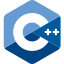
<br>

<div style="text-align:center; font-size:200%;">
 <b>Überladen</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 04 Überladen.ipynb -->
<!-- slides/module_150_classes/topic_100_overloading.cpp -->


## Überladen von Funktionen

- Wir können mehrere Varianten einer Funktion definieren, die sich durch die
  Parameter unterscheiden
- Die richtige Funktion wird zur Compilezeit anhand der Argumente ausgewählt
- Die Funktionen sind *überladen*
- Das geht sowohl für freistehende Funktionen als auch für Member-Functions


- Wir hatten schon eine Struct `Point` und Funktionen `print()` und
  `distance()` definiert:

In [ ]:
struct Point
{
    double x;
    double y;
}

In [ ]:
#include <iostream>

void print(const Point& p)
{
    std::cout << "Point{" << p.x << ", " << p.y << "}";
}

In [ ]:
#include <cmath>

double distance(const Point& p1, const Point& p2)
{
    double dx{p2.x - p1.x};
    double dy{p2.y - p1.y};
    return std::sqrt(dx * dx + dy * dy);
}


- Wir definieren `Point3d` mit zusätzlicher Koordinate `z`
- `print()` und `distance()`-Funktionen sollen auch
  `Point3d`-Argumente akzeptieren:

In [ ]:
struct Point3d
{
    double x;
    double y;
    double z;
}

In [ ]:
void print(const Point3d& p)
{
    std::cout << "Point3d{" << p.x << ", " << p.y << ", " << p.z << "}";
}

In [ ]:
double distance(const Point3d& p1, const Point3d& p2)
{
    double dx{p2.x - p1.x};
    double dy{p2.y - p1.y};
    double dz{p2.z - p1.z};
    return std::sqrt(dx * dx + dy * dy + dz * dz);
}

In [ ]:
Point p21{1.0, 2.0};
Point p22{2.0, 1.0};
Point3d p31{1.0, 2.0, 3.0};
Point3d p32{3.0, 2.0, 1.0};


## Überladen von Funktionen

- Wir können mehrere Definitionen einer Funktion haben
- Die Definitionen müssen sich in der **Anzahl** oder den **Typen** der
  **Parameter** unterscheiden
- Die richtige Funktion wird zur Compilezeit anhand der Anzahl und Typen der
  Argumente ausgewählt
- Dies wird auch *Überladen* (Overloading) genannt


## Auswahl der richtigen Funktion

- Die Auswahl der richtigen Funktion (Overload Resolution) erfolgt zur
  Compile-Zeit
- Der Compiler betrachtet die Menge alle Kandidaten (Overload Set)
- Die "Qualität" eines Kandidaten wird anhand der Argumente bewertet
  - Nur Kandidaten mit passender Anzahl von Argumenten werden weiter
    betrachtet
  - Je mehr Typumwandlungen für ein Argument notwendig sind, desto schlechter
    ist der Kandidat für dieses Argument
  - Ein Kandidat ist besser als ein anderer, wenn er für alle Argumente
    mindestens so gut ist wie der andere und für mindestens ein Argument
    besser
- Wenn es darin genau einen besten Kandidaten gibt, dann wird dieser
  ausgewählt
- Wenn es keinen Kandidaten oder mehrere beste Kandidaten gibt, dann wird ein
  Fehler zur Compile-Zeit erzeugt

In [ ]:
void f(int x)
{
    std::cout << "f(int): " << x << "\n";
}

In [ ]:
void f(int x, int y)
{
    std::cout << "f(int, int): " << x << ", " << y << "\n";
}

In [ ]:
void g(long x)
{
    std::cout << "g(long): " << x << "\n";
}

In [ ]:
void g(double x)
{
    std::cout << "g(double): " << x << "\n";
}

In [ ]:
void h(int x, int y)
{
    std::cout << "h(int, int): " << x << ", " << y << "\n";
}

In [ ]:
void h(double x, double y)
{
    std::cout << "h(double, double): " << x << ", " << y << "\n";
}

In [ ]:
long arg{2'000'000'000'000};


## Verwendung von Overloading

- Alle Overloads sollten die gleiche Semantik haben
- Für den Anwender sollte es keine Rolle spielen, welcher Overload verwendet
  wird
- Vermeiden Sie Funktionen mit subtilen oder komplizierten Überladungen


## Mini-Workshop: Ausgabe von Typen

Definieren Sie eine Funktion `print_type_of()`, die den Typ ihres Arguments
für Argumente der folgenden Typen ausgibt:
- `int`
- `double`
- `Point`
- `Point3d`


Die Aufrufe
```cpp
print_type_of(1);
print_type_of(1.0);
print_type_of(Point{1.0, 2.0});
print_type_of(Point3d{1.0, 2.0, 3.0});
```
sollen dann folgende Ausgabe erzeugen:
```
int
double
Point
Point3d
```